# Finding Heavy Traffic Indicators on I-94

Analyzing the westbound traffic using the I-94 Traffic Dataset

"We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository."

Indicators:
- Month of the year
- Day of the week
- Time of day

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

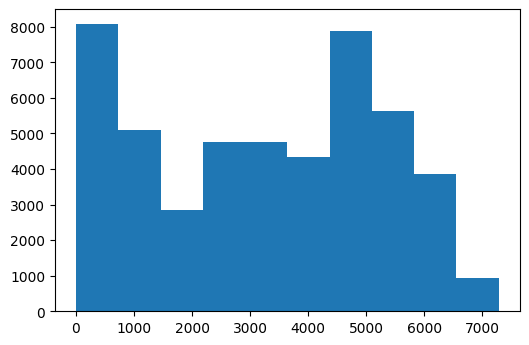

In [6]:
# traffic['traffic_volume'].hist()
traffic.traffic_volume.hist()  # using the pandas method
plt.grid(False)


In [7]:
traffic.traffic_volume.describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

## Traffic Volume: Day vs. Night

In [8]:
# Convert date_time column to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

#isolate the daytime and nighttime data
day = traffic[traffic['date_time'].dt.hour.between(7,18)] 
night = traffic[~(traffic['date_time'].dt.hour.between(7,18))]

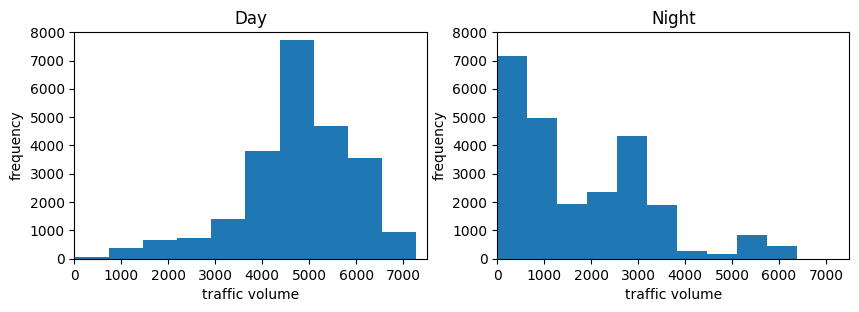

In [31]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
day.traffic_volume.hist()
plt.grid(False)
plt.title('Day')
plt.xlabel('traffic volume')
plt.ylabel('frequency')
plt.ylim(0,8000)
plt.xlim(0,7500)

plt.subplot(1, 2, 2)

night.traffic_volume.hist()
plt.grid(False)
plt.title('Night')
plt.xlabel('traffic volume') 
plt.ylabel('frequency')
plt.ylim(0,8000)
plt.xlim(0,7500)

plt.show()

In [32]:
day.describe()  # 4252 - 4559 -- 4820

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [33]:
night.describe()  # 530 - 2819 -- 1287

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


- What shape do the histograms have and what does that indicate?
- If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

The histograms show a skewed left statistical distribution for traffic volumne during the day and night  it is not clear. 

If considering only these distributions, I could disregard night in the analysis. However, I prefer to check other variables to be sure and to have other insights.

In [10]:
day_copy = day.copy()

months = day.copy()['date_time'].dt.month
day_by_month = day_copy.groupby(months).mean()
day_by_month['traffic_volume']


date_time
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [11]:
night_copy = night.copy()

night_copy['month'] = night['date_time'].dt.month
night_by_month = night_copy.groupby('month').mean()
night_by_month['traffic_volume']

month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

Text(0.5, 1.0, 'Night')

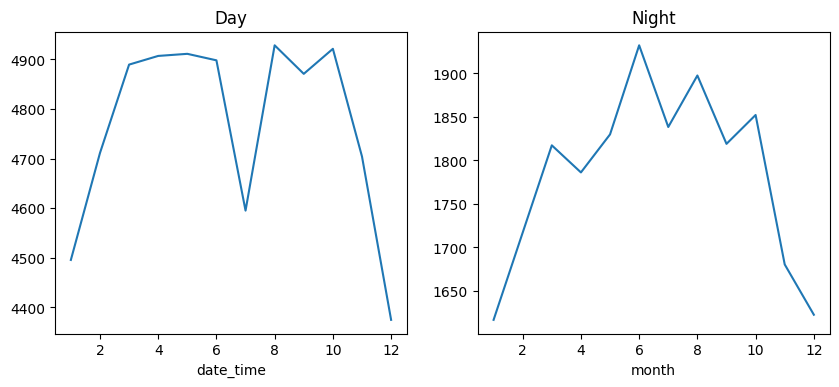

In [30]:
##### plt.plot(by_month['traffic_volume'])
# plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
day_by_month['traffic_volume'].plot.line()
plt.title('Day')

plt.subplot(1,2,2)
night_by_month['traffic_volume'].plot.line()
plt.title('Night')

In [13]:
pct = 1900/(4900+1900)
pct

0.27941176470588236

- What shape do the histograms have and what does that indicate?
- If the traffic is light at night, and our goal is to find indicators of heavy traffic, should we still be using the nighttime data?

The traffic in January, July and December during the day is lighter than in the other months. These months coincide with summer and winter holidays. 

The traffic at night is lighter than during the day, as expected. The total traffic at night increase between June and October.

## Weekdays

In [14]:
# # Convert date_time column to datetime
# traffic['date_time'] = pd.to_datetime(traffic['date_time'])

#isolate the daytime and nighttime data
traffic['day_of_week'] = traffic['date_time'].dt.dayofweek
by_dayofweek = traffic.groupby('day_of_week').mean()
# by_dayofweek['traffic_volume']

traffic['day_of_week']

0        1
1        1
2        1
3        1
4        1
        ..
48199    6
48200    6
48201    6
48202    6
48203    6
Name: day_of_week, Length: 48204, dtype: int64

([<matplotlib.axis.XTick at 0x7f53c6864f10>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

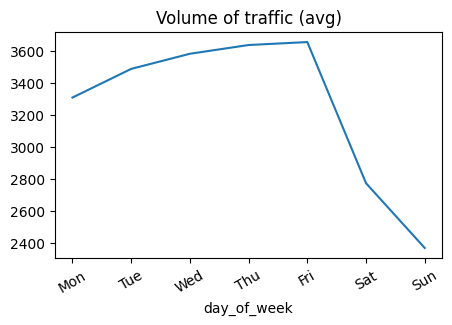

In [15]:
plt.figure(figsize=(5,3))
# plt.subplot(1,2,1)
by_dayofweek['traffic_volume'].plot.line()
plt.title('Volume of traffic (avg)')
plt.xticks(rotation=30, ticks=[0, 1,  2,  3,  4,  5,  6], 
           labels=["Mon",  "Tue",  "Wed",  "Thu",  "Fri",  "Sat",  "Sun"] )

# plt.subplot(1,2,2)
# night_by_month['traffic_volume'].plot.line()
# plt.title('Night')

The average volume of traffic increases in a light logarithmic scale during the weekdays and plummets in the weekend, especially on Sunday.

## Time

In [16]:
traffic['hour'] = traffic['date_time'].dt.hour
bussiness_days = traffic.copy()[traffic['day_of_week'] <= 4] # 4 == Friday
weekend = traffic.copy()[traffic['day_of_week'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


Text(0, 0.5, 'Frequency')

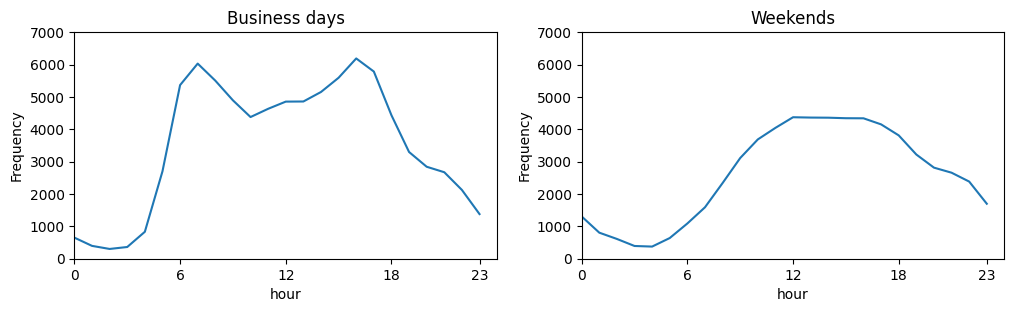

In [24]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business days')
plt.xticks(ticks = [0,6,12,18,23])
plt.xlim(0,24)
plt.ylim(0,7000)
plt.ylabel('Frequency')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekends')
plt.xticks(ticks = [0,6,12,18,23])
plt.xlim(0,24)
plt.ylim(0,7000)
plt.ylabel('Frequency')


- In business days the greater traffic is between 6ha and 18hs, especially in in the extremes, in times of entry and exit of work.
- During weekends, the traffic is lower than in business days, having  higher frequency in the afternoon, with a landing between around 11hs and 14hs.

In [34]:
by_hour_business.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day_of_week
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,281.268534,0.427828,0.000304,50.199192,3551.746687,1.985446
std,2.200834,1.463847,0.000377,4.355083,2033.102173,0.011273
min,278.432872,0.090036,0.000000,43.596841,301.982818,1.957888
25%,279.351920,0.112108,0.000058,45.504141,1939.322260,1.980674
50%,280.823762,0.124126,0.000130,52.126229,4406.314274,1.987894
75%,283.329144,0.153145,0.000470,53.933902,5206.242636,1.991680
max,284.450605,7.299358,0.001543,55.326531,6189.473647,2.006016


### Weather vs traffic volume

In [18]:
traffic.corr()['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
day_of_week      -0.149544
hour              0.352401
Name: traffic_volume, dtype: float64

Temperature is the main numerical weather variable that is correlated to the traffic volume. However, still, the correlation is weak. It can also be seen in the scatterplots below.

(230.0, 320.0)

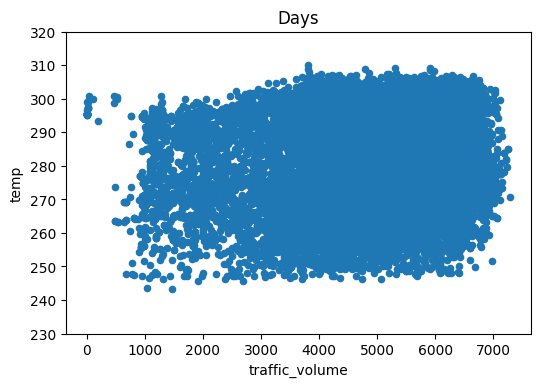

In [19]:
day.plot.scatter('traffic_volume', 'temp')
plt.title('Days')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
# plt.show()

(230.0, 320.0)

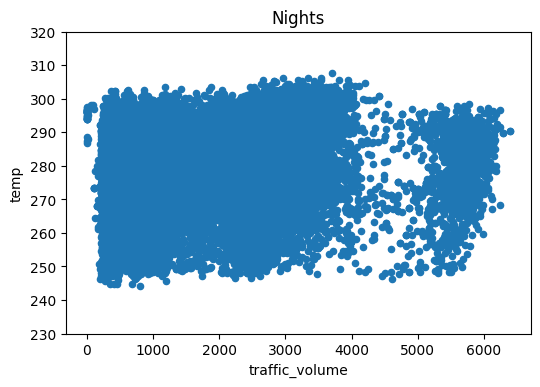

In [20]:
night.plot.scatter('traffic_volume', 'temp')
plt.title('Nights')
plt.ylim(230, 320)
# plt.show()

In [21]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,day_of_week,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,13


### Traffic volume vs weather main

The traffic frequency with categories in  weather's variables are analysed by comparing their means.

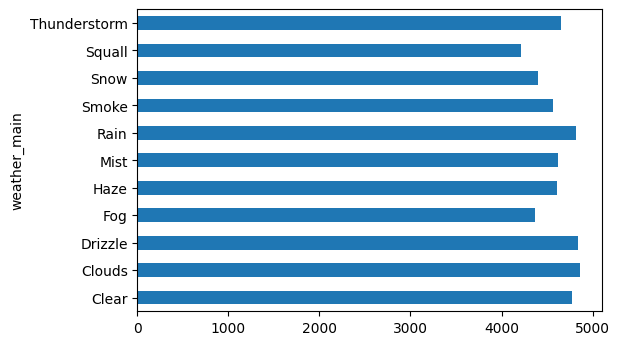

In [22]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()

# print(by_weather_main)

WRITE

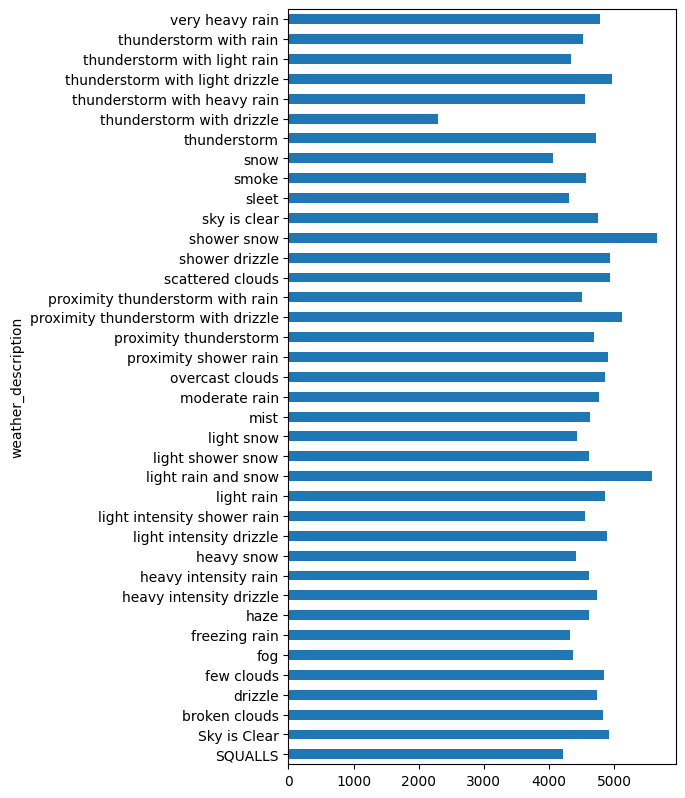

In [23]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
# plt.show()

We can see three weather types where traffic volume exceeds 5,000:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle
To find the reasons and draw conclusion for that we should make a deeper analysis about it. otherwise, anything will be mere speculation without knowledge of cause.

## Conclusion

The histograms show a skewed left statistical distribution for traffic volumne during the day and night  it is not clear. Considering the day the higher volume is between 4252 and 4559 autos in the highway , specially around 4820 autos.
and we can see a hight colume also between aproximately 3700 and 6500 autos in the highway. For the night, the most common volume is between 530 and 2819 autos in the highway, specially around 1287.

**Day vs night**  
- If considering the distributions of the traffic in day and night, I could disregard night in the analysis for  indicators of heavy traffic. However, I prefer to check other variables to have other insights.

- The traffic in January, July and December during the day is lighter than in the other months. These months coincide with summer and winter holidays. 

- The traffic at night is lighter than during the day, as expected. The total traffic at night increase between June and October.
 
**Hours**  
- The average volume of traffic increases in a light logarithmic scale during the weekdays and plummets in the weekend, especially on Sunday.

- In business days the greater traffic is between 6ha and 18hs, especially in in the extremes, in times of entry and exit of work.
- During weekends, the traffic is lower than in business days, having  higher frequency in the afternoon, with a landing between around 11hs and 14hs.

**Weather**  
- Temperature is the main numerical weather variable that is correlated to the traffic volume. However, still, the correlation is weak. It can also be seen in the scatterplots below.

- The weather indicators that seem to influence an increase in the traffic are: shower snow, light rain and snow, and proximity thunderstorm with drizzle.
